<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
Columns_Names=df.columns
#print(f'All coulumn Names: {Columns_Names}')

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


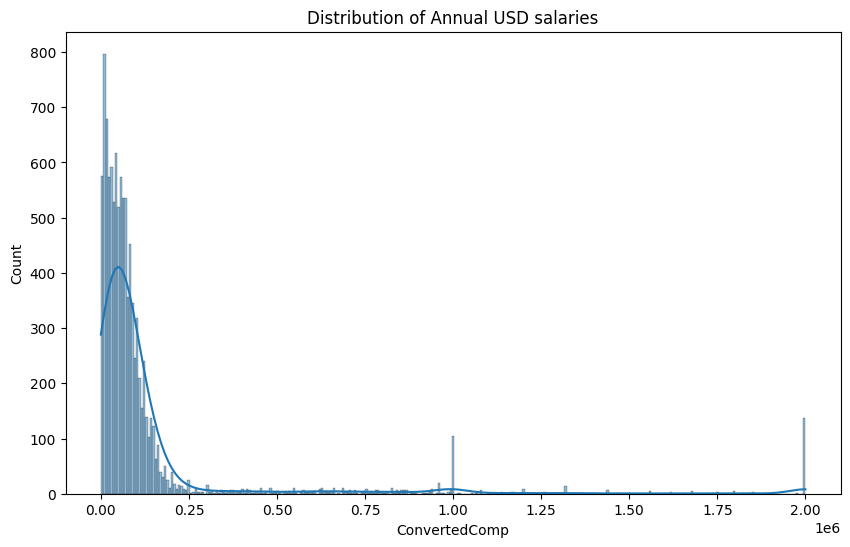

In [8]:
# your code goes here
plt.figure(figsize=(10,6))
sns.histplot(df['ConvertedComp'],kde=True)
plt.title('Distribution of Annual USD salaries')
plt.show()

Plot the histogram for the column `ConvertedComp`.


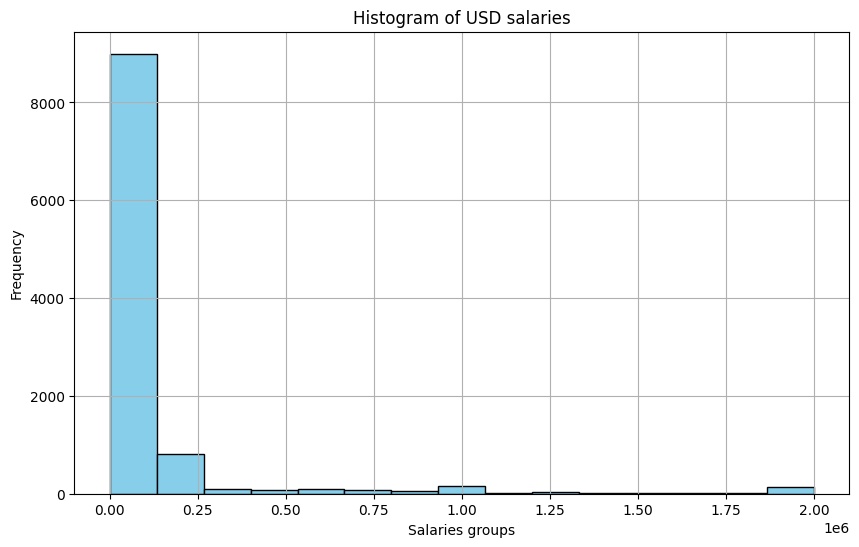

In [29]:
# your code goes here
plt.figure(figsize=(10,6))
df['ConvertedComp'].hist(bins=15, color='skyblue', edgecolor='black')
plt.title('Histogram of USD salaries')
plt.xlabel('Salaries groups')
plt.ylabel('Frequency')
plt.show()

What is the median of the column `ConvertedComp`?


In [55]:
# your code goes here
median_of_ConvertedComp=df['ConvertedComp'].median()
print(f'The median of ConvertedComp is: {median_of_ConvertedComp}')

The median of ConvertedComp is: 57745.0


How many responders identified themselves only as a **Man**?


In [70]:
#your code goes here
Man_count=(df['Gender'] == 'Man').count()
print(f'Total number of responders who identified themselves only as a Man are : {Man_count}')

Total number of responders who identified themselves only as a Man are : 11398


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [26]:
# your code goes here
woman_df=df[df['Gender']=='Woman']
Median_convertedComp_woman=woman_df['ConvertedComp'].median()
print(f'Median convertedcomp of Responders who identified themselves as a Woman is :  {Median_convertedComp_woman}')

Median convertedcomp of Responders who identified themselves as a Woman is :  57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [27]:
# your code goes here
summary= df['Age'].describe(percentiles=[0.25,0.5,0.75])
print('Five Number Summary for the column Age is :')
print(summary[['min','25%','50%','75%','max']])

Five Number Summary for the column Age is :
min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


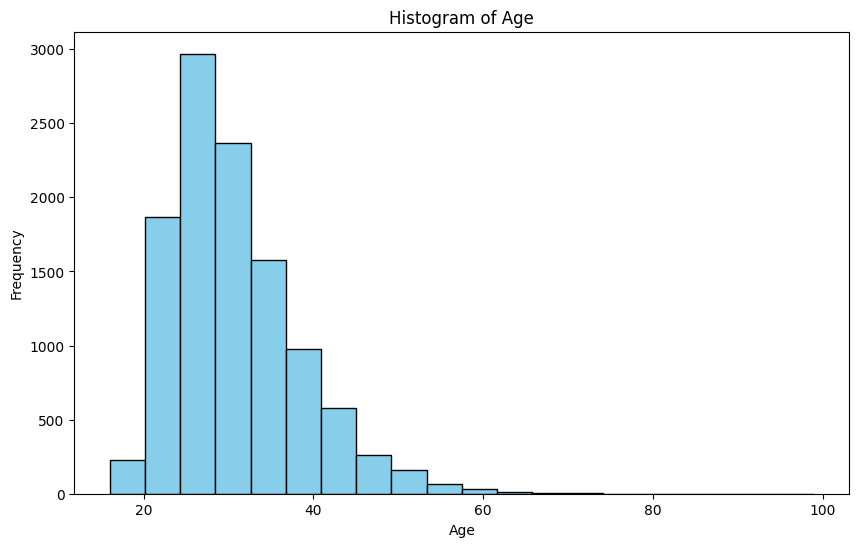

In [28]:
# your code goes here
plt.figure(figsize=(10,6))
plt.hist(df['Age'],bins=20,color='skyblue',edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


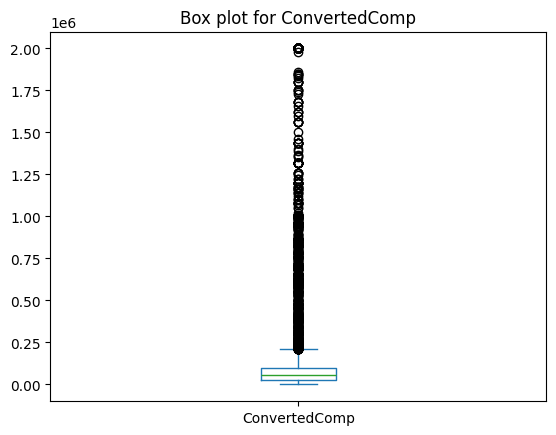

In [72]:
# your code goes here

import matplotlib.pyplot as plt
import seaborn as sns
df['ConvertedComp'].plot(kind='box',title= 'Box plot for ConvertedComp')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [35]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print(f'Inter Quartile Range for the ConvertedComp: {IQR}')

Inter Quartile Range for the ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [39]:
# your code goes here
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print('Lower Bound is =',lower_bound,'Upper Bound is =',upper_bound)

Lower Bound is = -82830.0 Upper Bound is = 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [44]:
# your code goes here
outliers = df['ConvertedComp'][(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

total_outlier=outliers.count()
print('Total number of ouliers in ConvertedComp =',total_outlier)

Total number of ouliers in ConvertedComp = 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [67]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers=df[(df['ConvertedComp'] >= lower_bound)& (df['ConvertedComp'] <= upper_bound)]
print('Original Data',df.shape)
print('Data without outliers',df_no_outliers.shape)

Original Data (11398, 85)
Data without outliers (9703, 85)


## Correlation


In [50]:
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,11398.000000,1.058900e+04,1.058200e+04,11276.000000,8972.000000,11111.000000
mean,12490.392437,7.570477e+05,1.315967e+05,42.064606,4.781071,30.778895
std,7235.461999,9.705598e+06,2.947865e+05,24.672741,4.567060,7.393686
min,4.000000,0.000000e+00,0.000000e+00,3.000000,0.000000,16.000000
25%,6264.250000,2.500000e+04,2.686800e+04,40.000000,2.000000,25.000000
50%,12484.000000,6.500000e+04,5.774500e+04,40.000000,4.000000,29.000000
75%,18784.750000,1.200000e+05,1.000000e+05,43.000000,5.000000,35.000000
max,25142.000000,7.000000e+08,2.000000e+06,1012.000000,99.000000,99.000000


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [52]:
# your code goes here
numerical_columns=['Age','Respondent','CompTotal','ConvertedComp','WorkWeekHrs','CodeRevHrs']
df_correlation=df[numerical_columns]
Correlation_matrix= df_correlation.corr()
print(Correlation_matrix)

                    Age  Respondent  CompTotal  ConvertedComp  WorkWeekHrs  \
Age            1.000000    0.004041   0.006970       0.105386     0.036518   
Respondent     0.004041    1.000000  -0.013490       0.002181    -0.015314   
CompTotal      0.006970   -0.013490   1.000000       0.001037     0.003510   
ConvertedComp  0.105386    0.002181   0.001037       1.000000     0.021143   
WorkWeekHrs    0.036518   -0.015314   0.003510       0.021143     1.000000   
CodeRevHrs    -0.020469    0.004621   0.007063      -0.033865     0.026517   

               CodeRevHrs  
Age             -0.020469  
Respondent       0.004621  
CompTotal        0.007063  
ConvertedComp   -0.033865  
WorkWeekHrs      0.026517  
CodeRevHrs       1.000000  


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
